In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Data used in few of the graphs

In [2]:
pars = pd.read_csv("dec_2022_ccs_data_converted/CA_DEC_2022 (TMAS).csv")
state_abbreviations = { 'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR', 'california': 'CA', 'colorado': 'CO', 'connecticut': 'CT', 'delaware': 'DE', 'florida': 'FL', 'georgia': 'GA', 'hawaii': 'HI', 'idaho': 'ID', 'illinois': 'IL', 'indiana': 'IN', 'iowa': 'IA', 'kansas': 'KS', 'kentucky': 'KY', 'louisiana': 'LA', 'maine': 'ME', 'maryland': 'MD', 'massachusetts': 'MA', 'michigan': 'MI', 'minnesota': 'MN', 'mississippi': 'MS', 'missouri': 'MO', 'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV', 'new hampshire': 'NH', 'new jersey': 'NJ', 'new mexico': 'NM', 'new york': 'NY', 'north carolina': 'NC', 'north dakota': 'ND', 'ohio': 'OH', 'oklahoma': 'OK', 'oregon': 'OR', 'pennsylvania': 'PA', 'rhode island': 'RI', 'south carolina': 'SC', 'south dakota': 'SD', 'tennessee': 'TN', 'texas': 'TX', 'utah': 'UT', 'vermont': 'VT', 'virginia': 'VA', 'washington': 'WA', 'west virginia': 'WV', 'wisconsin': 'WI', 'wyoming': 'WY' }


### Average Hour Volume of Station 11060 in California


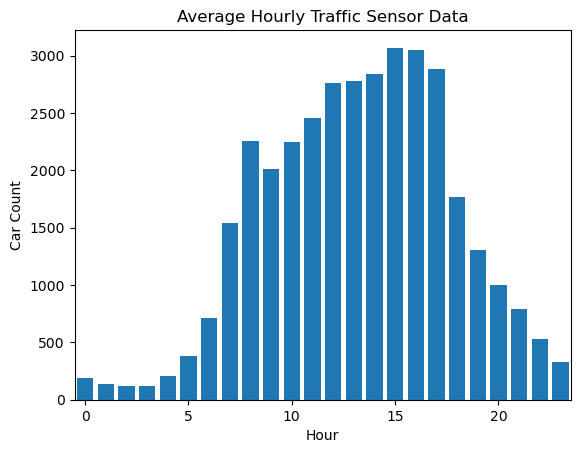

In [3]:
# Creates a smaller data set with certain condition stationid = 011060
station = pars[pars["Station_Id"] == 11060]
# Creates a dictionary with hour averages
hour_average = dict.fromkeys(range(0,24),0)
days = 31

# CALCULATES THE AVERAGES
for index, row, in station.iterrows():
    hour_average[row["Hour_Record"]] += row["Hour_Volume"]
for key in hour_average:
    hour_average[key] = round(hour_average[key] / days)

# PLOTS THE GRAPH
fig, ax = plt.subplots()
ax.bar(hour_average.keys(), hour_average.values(), )
ax.set_xlim(-.5,23.5)
ax.set_xlabel('Hour')
ax.set_ylabel('Car Count')
ax.set_title('Average Hourly Traffic Sensor Data')
plt.show()

### Compares the Different Travel Direction of Station 11060

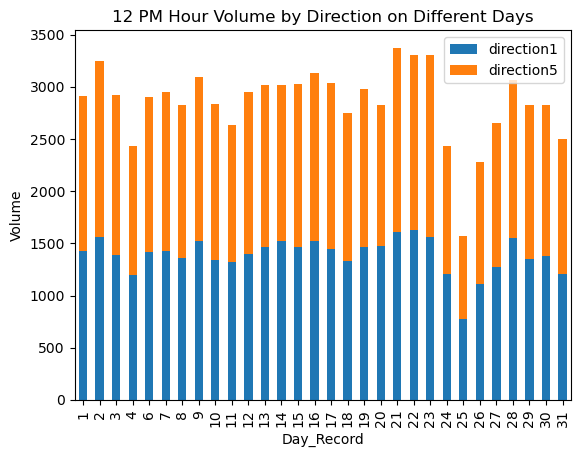

In [4]:
# Creates a smaller data set with certain condition stationid = 011060
station1 = pars[pars["Station_Id"] == 11060]

# data at 12 am from direction = 1
noon_time_data_dir1 = station1[(station1["Hour_Record"] == 12) & (station1["Travel_Dir"] == 1)]
noon_time_data_dir5 = station1[(station1["Hour_Record"] == 12) & (station1["Travel_Dir"] == 5)]

#sets the index of these to day record, 
# inplace = true means whether to modify or create new one  
noon_time_data_dir1.set_index('Day_Record', inplace=True)
noon_time_data_dir5.set_index('Day_Record', inplace=True)

bar_graph = pd.DataFrame({
    'direction1': noon_time_data_dir1["Hour_Volume"],
    'direction5': noon_time_data_dir5["Hour_Volume"]})

ax = bar_graph.plot.bar(stacked = True)
#ax = bar_graph.plot.bar()

ax.set_ylabel("Volume")
ax.set_title('12 PM Hour Volume by Direction on Different Days')

plt.show()

Creates a Graph of the Average Hourly Volume of Cars in a User Inputted State

using station: 099930


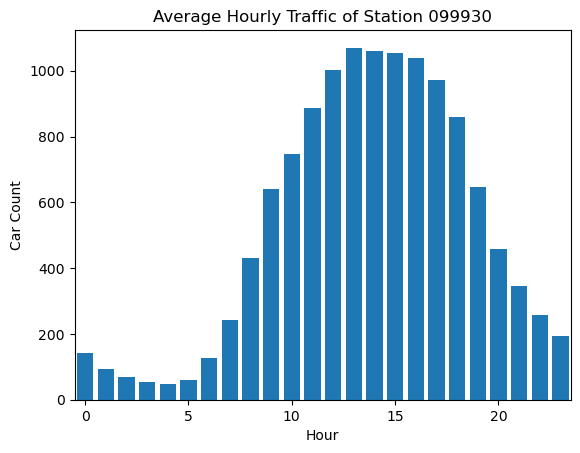

In [5]:
state = input("Enter the name of the state: ")

#Checks to make sure its a valid state
while(not(state.lower() in state_abbreviations.keys())):
    state = input("Please enter a valid state: ")
abbrevation = state_abbreviations[state.lower()]

#gets the dataset
df = pd.read_csv(f"dec_2022_ccs_data_converted/{abbrevation}_DEC_2022 (TMAS).csv", dtype = { 'Record_Type': int, 'State_Code' : int, 'F_System' : str, 'Station_Id' : str, 'Travel_Dir' : int, 'Year_Record' : int,
                                                                                                       'Month_Record': int,'Day_Record' : int,'Day_of_Week' : int,'Hour_Record' : int ,'Hour_Volume' : int ,'Restrictions' : int})

#gets the station ID, only doing random right now
station_id_input = input("Next, enter the station you want to find (type R for a random one): ")
if(station_id_input.lower() == 'r'): 
    # sample() gets a random row
    station_id = df.sample()['Station_Id'].values[0]
else:
    station_id = station_id_input

print(f'using station: {station_id}')
# Creates a smaller data set with certain condition stationid = 011060
station = df[df["Station_Id"] == station_id]
# Creates a dictionary with hour averages
hour_average = dict.fromkeys(range(0,24),0)
# Records how many days so it can take the average
days = 31
#iterates through rows
for index, row, in station.iterrows():
    hour_average[row["Hour_Record"]] += row["Hour_Volume"]
# finds the average
for key in hour_average:
    hour_average[key] = round(hour_average[key] / days)
# Plots it
fig, ax = plt.subplots()
ax.bar(hour_average.keys(), hour_average.values(), )
ax.set_xlim(-.5,23.5)
ax.set_xlabel('Hour')
ax.set_ylabel('Car Count')
ax.set_title('Average Hourly Traffic of Station ' + str(station_id))
plt.show()


## Comparing Two Stations' Hourly Average
For December

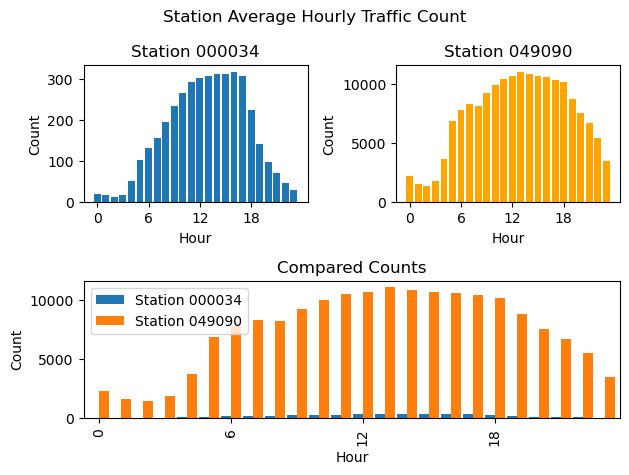

In [7]:
# Getting the first state and ID
state1 = input("Enter the name of the first state: ")
while(not(state1.lower() in state_abbreviations.keys())):
    state1 = input("Enter a valid state: ")
abbreviation1 = state_abbreviations[state1.lower()]
# Second state
state2 = input("Enter the name of the second state: ")
while(not(state2.lower() in state_abbreviations.keys())):
    state2 = input("Enter a valid state: ")
abbreviation2 = state_abbreviations[state2.lower()]

#loads the data
state1_data = pd.read_csv(f"dec_2022_ccs_data_converted/{abbreviation1}_DEC_2022 (TMAS).csv", dtype = { 'Record_Type': int, 'State_Code' : int, 'F_System' : str, 'Station_Id' : str, 'Travel_Dir' : int, 'Year_Record' : int,
                                                                                                       'Month_Record': int,'Day_Record' : int,'Day_of_Week' : int,'Hour_Record' : int ,'Hour_Volume' : int ,'Restrictions' : int})
state2_data = pd.read_csv(f"dec_2022_ccs_data_converted/{abbreviation2}_DEC_2022 (TMAS).csv", dtype = { 'Record_Type': int, 'State_Code' : int, 'F_System' : str, 'Station_Id' : str, 'Travel_Dir' : int, 'Year_Record' : int,
                                                                                                       'Month_Record': int,'Day_Record' : int,'Day_of_Week' : int,'Hour_Record' : int ,'Hour_Volume' : int ,'Restrictions' : int})

#Gets station ID input
station_id_input = input('Next, enter the station id from ' + abbreviation1)
if(station_id_input.lower() == 'r'): 
    # sample() gets a random row
    station_id1 = state1_data.sample()['Station_Id'].values[0]
else:
    station_id1 = station_id_input
station_id_input = input('Next, enter the station id from ' + abbreviation2)
if(station_id_input.lower() == 'r'): 
    # sample() gets a random row
    station_id2 = state2_data.sample()['Station_Id'].values[0]
else:
    station_id2 = station_id_input

# Finds the average for the two stations
station1 = state1_data[state1_data['Station_Id'] == station_id1]
hour_average_station1 = dict.fromkeys(range(0,24),0)
days = 31
for index, row, in station1.iterrows():
    hour_average_station1[row['Hour_Record']] += row['Hour_Volume']
for key in hour_average_station1:
    hour_average_station1[key] = round(hour_average_station1[key] / days)
station2 = state2_data[state2_data['Station_Id'] == station_id2]
hour_average_station2 = dict.fromkeys(range(0,24),0)
for index, row, in station2.iterrows():
    hour_average_station2[row['Hour_Record']] += row['Hour_Volume']
for key in hour_average_station2:
    hour_average_station2[key] = round(hour_average_station2[key] / days)

# Plots the two graphs
ax1 = plt.subplot(2,2,1)
ax1.bar(hour_average_station1.keys(), hour_average_station1.values())
ax1.set_title(f'Station {station_id1}')
ax1.set_ylabel('Count')
ax1.set_xlabel('Hour')
ax1.set_xticks([i for i in range(0,24,6)])

ax2 = plt.subplot(2,2,2)
ax2.bar(hour_average_station2.keys(), hour_average_station2.values(), color = 'orange')
ax2.set_title(f'Station {station_id2}')
ax2.set_ylabel('Count')
ax2.set_xlabel('Hour')
ax2.set_xticks([i for i in range(0,24,6)])

side_by_side = pd.DataFrame({f'Station {station_id1}': hour_average_station1,f'Station {station_id2}': hour_average_station2})

ax3 = plt.subplot(2,1,2)
side_by_side.plot.bar(ax = ax3,width=0.9)
ax3.set_xticks([i for i in range(0,24,6)])
ax3.set_xlabel('Hour')
ax3.set_ylabel('Count')
ax3.set_title('Compared Counts')

plt.suptitle('Station Average Hourly Traffic Count')
# Makes sure theres no overlap
plt.tight_layout()
plt.show()